In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

In [49]:
df = pd.read_excel("Dustevent.xls")

In [51]:
df['AE_450-700']=(-(np.log(df['Sca450']/df['Sca700'])))/(np.log(450/700))
df['AE_450-550']=(-(np.log(df['Sca450']/df['Sca550'])))/(np.log(450/550))
df['AE_550-700']=(-(np.log(df['Sca550']/df['Sca700'])))/(np.log(550/700))

In [3]:
df[["DateTimeUTC"]]

,DateTimeUTC,T_S11,P_S11,day,hour,Sca450,Sca550,Sca700,X1_A41,X2_A41,X3_A41,X4_A41,X5_A41,X6_A41,X7_A41,XR_A31
0,2021-02-12 00:00:00,22.3,927.7,43,0,NaN,NaN,NaN,1.103,0.925,0.833,0.781,0.727,0.648,0.654,0.698
1,2021-02-12 00:01:00,22.3,927.7,43,0,NaN,NaN,NaN,1.034,0.888,0.779,0.734,0.666,0.594,0.605,0.751
2,2021-02-12 00:02:00,22.3,927.7,43,0,NaN,NaN,NaN,1.060,0.877,0.791,0.730,0.681,0.600,0.623,0.623
3,2021-02-12 00:03:00,22.3,927.7,43,0,NaN,NaN,NaN,1.036,0.874,0.784,0.734,0.666,0.578,0.603,0.727
4,2021-02-12 00:04:00,22.5,938.2,43,0,35.13,25.57,15.45,1.047,0.889,0.782,0.737,0.689,0.610,0.613,0.541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40296,2021-03-11 23:55:00,22.6,942.9,70,23,95.69,67.83,40.42,2.428,2.057,1.838,1.755,1.625,1.464,1.495,1.416
40297,2021-03-11 23:56:00,22.6,942.9,70,23,94.02,68.48,39.39,2.464,2.089,1.882,1.754,1.632,1.482,1.547,1.508
40298,2021-03-11 23:57:00,22.6,942.7,70,23,NaN,NaN,NaN,2.474,2.093,1.875,1.776,1.679,1.503,1.537,1.569
40299,2021-03-11 23:58:00,22.3,931.9,70,23,NaN,NaN,NaN,2.455,2.072,1.859,1.778,1.661,1.498,1.498,1.551


In [52]:
df['Dates'] = pd.to_datetime(df['DateTimeUTC']).dt.date

In [53]:
df[["Dates","Sca450","Sca550","Sca700","Bsca450","Bsca550","Bsca700","AE_450-700","AE_450-550","AE_550-700"]].head(10)

,Dates,Sca450,Sca550,Sca700,Bsca450,Bsca550,Bsca700,AE_450-700,AE_450-550,AE_550-700
0,2021-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-12,35.13,25.57,15.45,4.54,3.78,1.92,1.859180,1.582870,2.089096
5,2021-02-12,36.27,25.66,14.51,4.83,3.52,3.15,2.073529,1.724505,2.363951
6,2021-02-12,35.96,25.94,16.02,5.24,3.89,2.73,1.830035,1.627647,1.998441
7,2021-02-12,36.37,25.95,15.96,5.05,3.67,2.69,1.864187,1.682222,2.015599
8,2021-02-12,36.94,26.35,15.32,5.58,4.23,3.66,1.992011,1.683488,2.248733
9,2021-02-12,37.61,26.95,17.62,5.01,4.12,2.90,1.716114,1.660864,1.762088


In [54]:
df=df.dropna(axis=0)

In [57]:
df[["DateTimeUTC","Dates","Sca450","Sca550","Sca700","Bsca450","Bsca550","Bsca700"]].head(10)

,DateTimeUTC,Dates,Sca450,Sca550,Sca700,Bsca450,Bsca550,Bsca700
4,2021-02-12 00:04:00,2021-02-12,35.13,25.57,15.45,4.54,3.78,1.92
5,2021-02-12 00:05:00,2021-02-12,36.27,25.66,14.51,4.83,3.52,3.15
6,2021-02-12 00:06:00,2021-02-12,35.96,25.94,16.02,5.24,3.89,2.73
7,2021-02-12 00:07:00,2021-02-12,36.37,25.95,15.96,5.05,3.67,2.69
8,2021-02-12 00:08:00,2021-02-12,36.94,26.35,15.32,5.58,4.23,3.66
9,2021-02-12 00:09:00,2021-02-12,37.61,26.95,17.62,5.01,4.12,2.90
10,2021-02-12 00:10:00,2021-02-12,37.37,27.08,16.12,5.17,3.88,1.89
11,2021-02-12 00:11:00,2021-02-12,38.04,27.37,17.15,5.58,4.09,2.43
12,2021-02-12 00:12:00,2021-02-12,39.85,28.18,15.72,5.23,4.11,2.72
13,2021-02-12 00:13:00,2021-02-12,39.09,28.57,16.80,5.65,4.27,2.96


In [56]:
df[["DateTimeUTC","Dates","Sca450","Sca550","Sca700","Bsca450","Bsca550","Bsca700","AE_450-700","AE_450-550","AE_550-700"]].head(10)

,DateTimeUTC,Dates,Sca450,Sca550,Sca700,Bsca450,Bsca550,Bsca700,AE_450-700,AE_450-550,AE_550-700
4,2021-02-12 00:04:00,2021-02-12,35.13,25.57,15.45,4.54,3.78,1.92,1.859180,1.582870,2.089096
5,2021-02-12 00:05:00,2021-02-12,36.27,25.66,14.51,4.83,3.52,3.15,2.073529,1.724505,2.363951
6,2021-02-12 00:06:00,2021-02-12,35.96,25.94,16.02,5.24,3.89,2.73,1.830035,1.627647,1.998441
7,2021-02-12 00:07:00,2021-02-12,36.37,25.95,15.96,5.05,3.67,2.69,1.864187,1.682222,2.015599
8,2021-02-12 00:08:00,2021-02-12,36.94,26.35,15.32,5.58,4.23,3.66,1.992011,1.683488,2.248733
9,2021-02-12 00:09:00,2021-02-12,37.61,26.95,17.62,5.01,4.12,2.90,1.716114,1.660864,1.762088
10,2021-02-12 00:10:00,2021-02-12,37.37,27.08,16.12,5.17,3.88,1.89,1.902999,1.604982,2.150980
11,2021-02-12 00:11:00,2021-02-12,38.04,27.37,17.15,5.58,4.09,2.43,1.803035,1.640452,1.938320
12,2021-02-12 00:12:00,2021-02-12,39.85,28.18,15.72,5.23,4.11,2.72,2.105296,1.726759,2.420276
13,2021-02-12 00:13:00,2021-02-12,39.09,28.57,16.80,5.65,4.27,2.96,1.911329,1.562308,2.201749


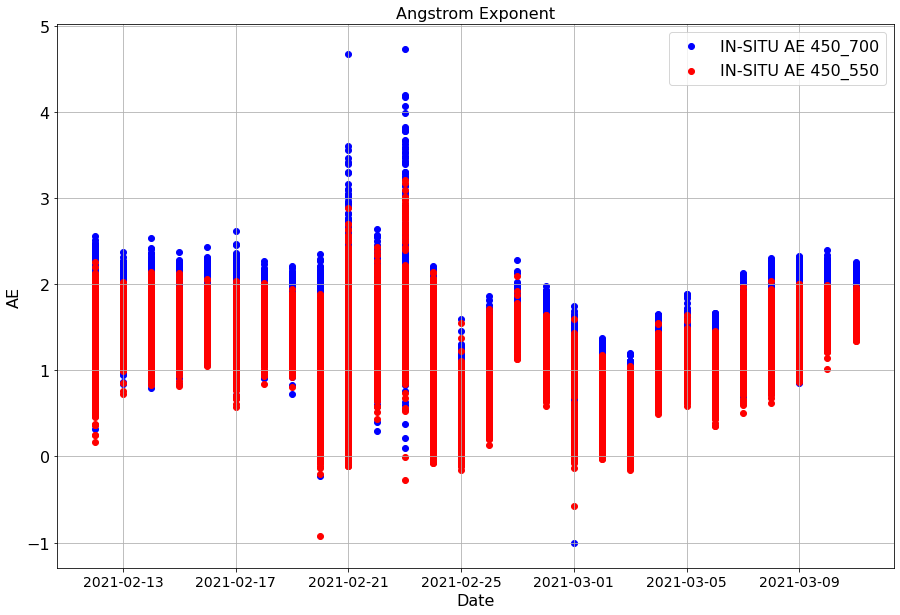

In [48]:
plt.scatter(df['Dates'],df['AE_450-700'], c ="blue", label='IN-SITU AE 450_700')
plt.scatter(df['Dates'],df['AE_450-550'], c ="red",label='IN-SITU AE 450_550')
#plt.scatter(df['Dates'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(df['day'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(x=df['hour'],y=df['AOD550'], c ="red",label='AOD550')
#plt.scatter(x=df['hour'],y=df['AOD700'], c ="green",label='AOD700')
plt.xlabel('Date',fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.ylabel('AE',fontsize=16)
plt.tick_params(axis='y', labelsize=16)
#plt.xlim(35, 65)
plt.legend()
plt.rcParams["figure.figsize"] = (15,10)
#plt.xlabel('Relative Humidity',fontsize=16)
#plt.ylabel('Growth Factor',fontsize=16)
#plt.ylim(0.75, 2)
plt.grid()
plt.title("Angstrom Exponent",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})
#plt.legend()
plt.show()

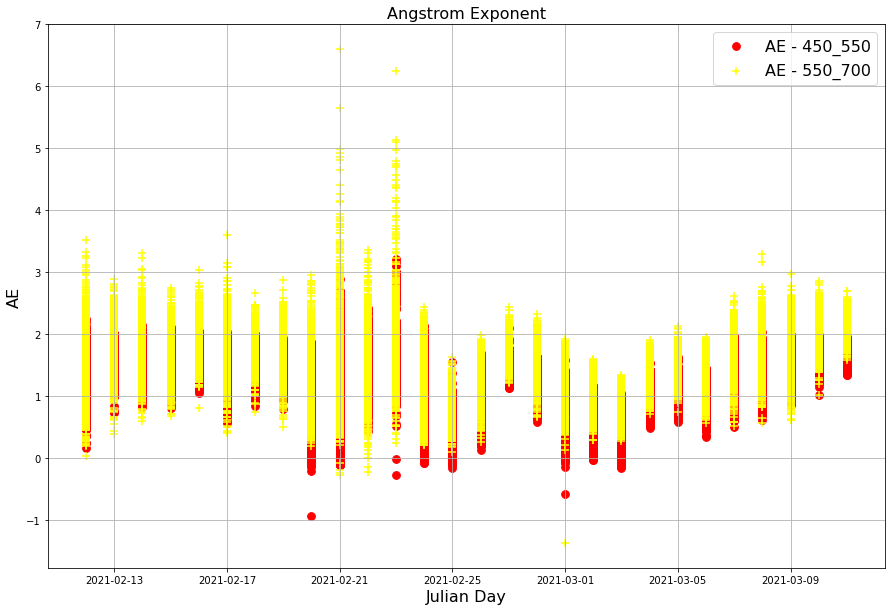

In [38]:
#plt.scatter(df['day'],df['AE_450-700'], c ="blue",marker='X', s=60, label='AE - 450_700')
plt.scatter(df['Dates'],df['AE_450-550'], c ="red",marker='o',s=60,label='AE - 450_550')
plt.scatter(df['Dates'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(x=df['hour'],y=df['AOD550'], c ="red",label='AOD550')
#plt.scatter(x=df['hour'],y=df['AOD700'], c ="green",label='AOD700')
plt.xlabel('Date',fontsize=16)
plt.ylabel('AE',fontsize=16)
#plt.xlim(35, 65)
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)
#plt.xlabel('Relative Humidity',fontsize=16)
#plt.ylabel('Growth Factor',fontsize=16)
#plt.ylim(0.75, 2)
plt.grid()
plt.title("Angstrom Exponent",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})
#plt.legend()
plt.show()

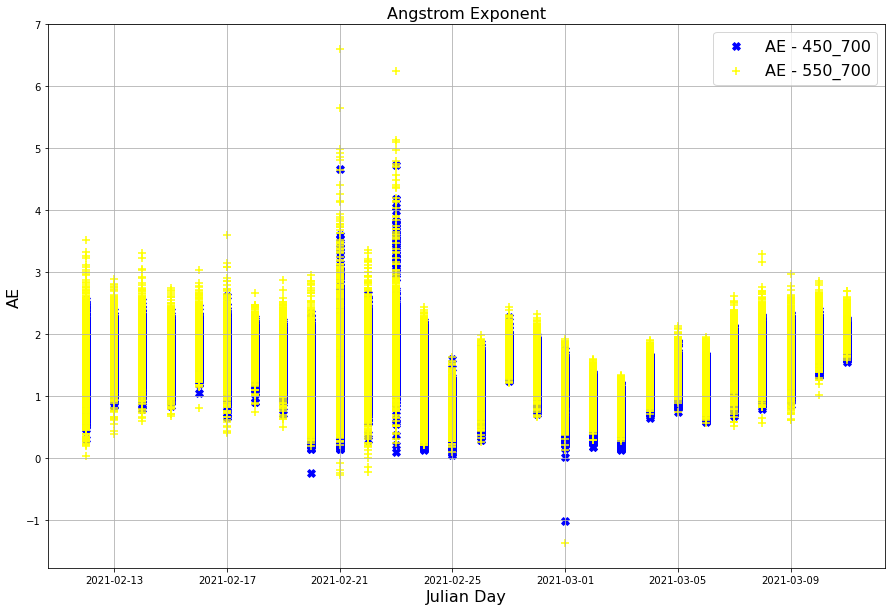

In [42]:
plt.scatter(df['Dates'],df['AE_450-700'], c ="blue",marker='X', s=60, label='AE - 450_700')
#plt.scatter(df['day'],df['AE_450-550'], c ="red",marker='o',s=60,label='AE - 450_550')
plt.scatter(df['Dates'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(x=df['hour'],y=df['AOD550'], c ="red",label='AOD550')
#plt.scatter(x=df['hour'],y=df['AOD700'], c ="green",label='AOD700')
plt.xlabel('Julian Day',fontsize=16)
plt.ylabel('AE',fontsize=16)
#plt.xlim(35, 65)
plt.legend()
plt.rcParams["figure.figsize"] = (15,10)
#plt.xlabel('Relative Humidity',fontsize=16)
#plt.ylabel('Growth Factor',fontsize=16)
#plt.ylim(0.75, 2)
plt.grid()
plt.title("Angstrom Exponent",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})
#plt.legend()
plt.show()

In [59]:
df2 = pd.read_excel("20210212_20210311_Granada.xls")

In [28]:
df2

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_500nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,12:02:2021,09:50:41,43,0.019085,0.022213,0.025804,-999,-999,0.026612,0.032826,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
1,12:02:2021,10:39:46,43,1.190452,1.085527,1.037212,-999,-999,0.990770,0.980857,...,0.3796,0.3395,-999.0000,-999,-999,-999,-999,-999,-999,-999
2,12:02:2021,10:49:39,43,0.566793,0.509338,0.499179,-999,-999,0.462060,0.448338,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
3,12:02:2021,10:53:41,43,0.593816,0.543751,0.501075,-999,-999,0.455580,0.454489,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
4,12:02:2021,10:56:41,43,0.417273,0.401146,0.368670,-999,-999,0.346168,0.306905,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,11:03:2021,17:15:28,70,0.086656,0.099529,0.110092,-999,-999,0.130646,0.178611,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
2432,11:03:2021,17:19:34,70,0.059227,0.073861,0.084191,-999,-999,0.104693,0.151875,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
2433,11:03:2021,17:21:27,70,0.045739,0.062230,0.070104,-999,-999,0.089203,0.133581,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
2434,11:03:2021,17:24:29,70,0.100764,0.112741,0.118768,-999,-999,0.135844,0.177897,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999


In [19]:
df2[["AOD_440nm","AOD_500nm","AOD_675nm","Date(dd:mm:yyyy)","380-500_Angstrom_Exponent","440-675_Angstrom_Exponent","500-870_Angstrom_Exponent"]]

,AOD_440nm,AOD_500nm,AOD_675nm,Date(dd:mm:yyyy),380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent
0,0.038184,0.032826,0.026612,12:02:2021,0.570716,0.817774,0.443302
1,0.938344,0.980857,0.990770,12:02:2021,-0.225942,-0.110329,-0.098936
2,0.443479,0.448338,0.462060,12:02:2021,0.011519,-0.096699,-0.191341
3,0.446034,0.454489,0.455580,12:02:2021,-0.456964,-0.042072,-0.171260
4,0.314906,0.306905,0.346168,12:02:2021,0.021302,-0.253214,-0.333690
...,...,...,...,...,...,...,...
2431,0.203962,0.178611,0.130646,11:03:2021,1.068113,1.040828,0.880091
2432,0.177079,0.151875,0.104693,11:03:2021,1.204930,1.229869,1.072061
2433,0.159628,0.133581,0.089203,11:03:2021,1.275151,1.356943,1.171270
2434,0.203186,0.177897,0.135844,11:03:2021,0.963829,0.933068,0.735726


In [60]:
df2.rename(columns = {'Date(dd:mm:yyyy)':'Date'}, inplace = True)

In [58]:
df2[["Date","AOD_440nm","AOD_500nm","AOD_675nm"]]

,AOD_440nm,AOD_500nm,AOD_675nm,Date,380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent
0,0.038184,0.032826,0.026612,2021-02-12,0.570716,0.817774,0.443302
1,0.938344,0.980857,0.990770,2021-02-12,-0.225942,-0.110329,-0.098936
2,0.443479,0.448338,0.462060,2021-02-12,0.011519,-0.096699,-0.191341
3,0.446034,0.454489,0.455580,2021-02-12,-0.456964,-0.042072,-0.171260
4,0.314906,0.306905,0.346168,2021-02-12,0.021302,-0.253214,-0.333690
...,...,...,...,...,...,...,...
2431,0.203962,0.178611,0.130646,2021-03-11,1.068113,1.040828,0.880091
2432,0.177079,0.151875,0.104693,2021-03-11,1.204930,1.229869,1.072061
2433,0.159628,0.133581,0.089203,2021-03-11,1.275151,1.356943,1.171270
2434,0.203186,0.177897,0.135844,2021-03-11,0.963829,0.933068,0.735726


In [37]:
df2.rename(columns = {'AE_380-500':'380-500_Angstrom_Exponent', 'AE_440-675':'440-675_Angstrom_Exponent','AE_500-870':'500-870_Angstrom_Exponent'}, inplace = True)


In [33]:
df2

,Date,Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_500nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,2021-02-12,09:50:41,43,0.019085,0.022213,0.025804,-999,-999,0.026612,0.032826,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
1,2021-02-12,10:39:46,43,1.190452,1.085527,1.037212,-999,-999,0.990770,0.980857,...,0.3796,0.3395,-999.0000,-999,-999,-999,-999,-999,-999,-999
2,2021-02-12,10:49:39,43,0.566793,0.509338,0.499179,-999,-999,0.462060,0.448338,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
3,2021-02-12,10:53:41,43,0.593816,0.543751,0.501075,-999,-999,0.455580,0.454489,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
4,2021-02-12,10:56:41,43,0.417273,0.401146,0.368670,-999,-999,0.346168,0.306905,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,2021-03-11,17:15:28,70,0.086656,0.099529,0.110092,-999,-999,0.130646,0.178611,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
2432,2021-03-11,17:19:34,70,0.059227,0.073861,0.084191,-999,-999,0.104693,0.151875,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
2433,2021-03-11,17:21:27,70,0.045739,0.062230,0.070104,-999,-999,0.089203,0.133581,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999
2434,2021-03-11,17:24:29,70,0.100764,0.112741,0.118768,-999,-999,0.135844,0.177897,...,0.3796,0.3395,0.9368,-999,-999,-999,-999,-999,-999,-999


In [61]:
#df2['Date'] = pd.to_datetime(df2["Date"].dt.strftime('%Y-%m-%d'))


#pd.to_datetime(df2['Date']).dt.strftime("%Y-%m-%d")

df2['Date'] = pd.to_datetime(df2['Date'].str.replace(':','-'),format='%d-%m-%Y')


In [64]:
df2[["Date","AOD_440nm","AOD_500nm","AOD_675nm","AE_380-500","AE_440-675","AE_500-870"]].head(10)

,Date,AOD_440nm,AOD_500nm,AOD_675nm,AE_380-500,AE_440-675,AE_500-870
0,2021-02-12,0.038184,0.032826,0.026612,0.570716,0.817774,0.443302
1,2021-02-12,0.938344,0.980857,0.990770,-0.225942,-0.110329,-0.098936
2,2021-02-12,0.443479,0.448338,0.462060,0.011519,-0.096699,-0.191341
3,2021-02-12,0.446034,0.454489,0.455580,-0.456964,-0.042072,-0.171260
4,2021-02-12,0.314906,0.306905,0.346168,0.021302,-0.253214,-0.333690
5,2021-02-12,0.299534,0.287613,0.275186,0.104091,0.188975,0.070536
6,2021-02-12,0.268334,0.261399,0.252441,0.179923,0.137910,0.021028
7,2021-02-12,0.169361,0.161073,0.165726,0.406575,0.024725,-0.127413
8,2021-02-12,0.286292,0.287075,0.306372,-0.159086,-0.168770,-0.241486
9,2021-02-12,0.205451,0.204220,0.196554,0.384302,0.107703,0.006478


In [68]:
df2['AOD_450nm']=df2['AOD_440nm']*(450/440)**(-(df2['AE_380-500']))
df2['AOD_550nm']=df2['AOD_500nm']*(550/500)**(-(df2['AE_440-675']))
df2['AOD_700nm']=df2['AOD_675nm']*(700/675)**(-(df2['AE_500-870']))

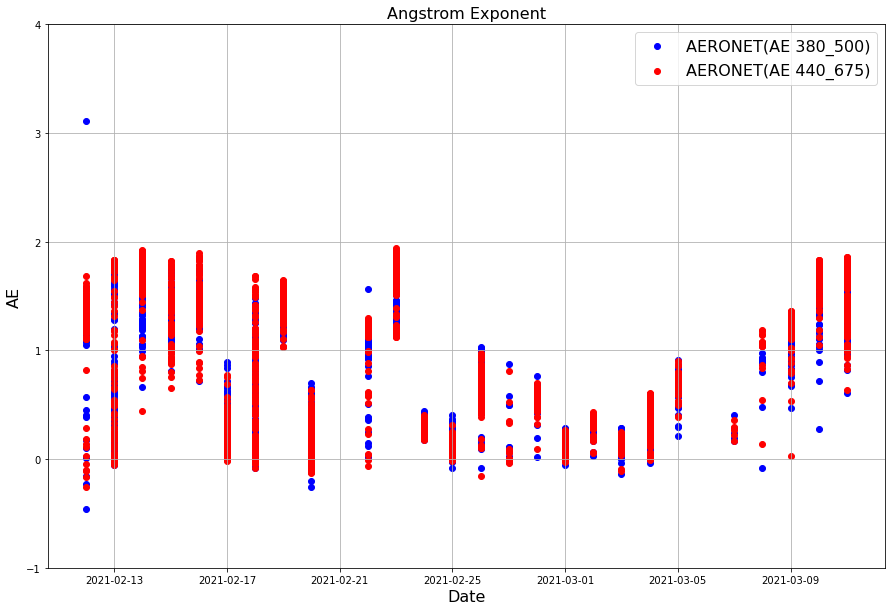

In [18]:
plt.scatter(df2['Date'],df2['380-500_Angstrom_Exponent'], c ="blue", label='AERONET(AE 380_500)')
plt.scatter(df2['Date'],df2['440-675_Angstrom_Exponent'], c ="red",label='AERONET(AE 440_675)')
#plt.scatter(df['day'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(x=df['hour'],y=df['AOD550'], c ="red",label='AOD550')
#plt.scatter(x=df['hour'],y=df['AOD700'], c ="green",label='AOD700')
plt.xlabel('Date',fontsize=16)
plt.ylabel('AE',fontsize=16)
#plt.xlim(35, 65)
plt.legend()
plt.rcParams["figure.figsize"] = (15,10)
#plt.xlabel('Relative Humidity',fontsize=16)
#plt.ylabel('Growth Factor',fontsize=16)
plt.ylim(-1, 4)
plt.grid()
plt.title("Angstrom Exponent",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})
#plt.legend()
plt.show()

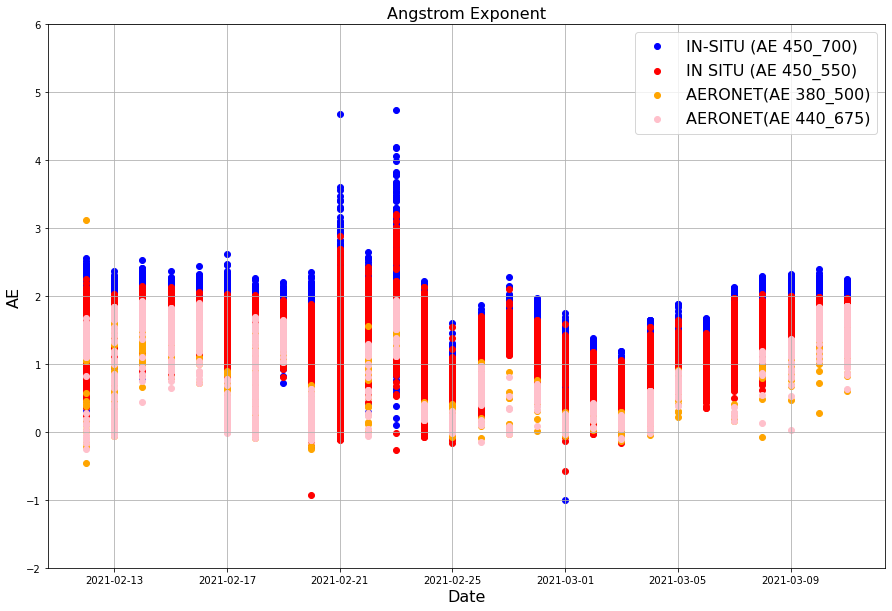

In [25]:
plt.scatter(df['Dates'],df['AE_450-700'], c ="blue", label='IN-SITU (AE 450_700)')
plt.scatter(df['Dates'],df['AE_450-550'], c ="red",label='IN SITU (AE 450_550)')
plt.scatter(df2['Date'],df2['380-500_Angstrom_Exponent'], c ="orange", label='AERONET(AE 380_500)')
plt.scatter(df2['Date'],df2['440-675_Angstrom_Exponent'], c ="pink",label='AERONET(AE 440_675)')

#plt.scatter(df['day'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(x=df['hour'],y=df['AOD550'], c ="red",label='AOD550')
#plt.scatter(x=df['hour'],y=df['AOD700'], c ="green",label='AOD700')
plt.xlabel('Date',fontsize=16)

plt.ylabel('AE',fontsize=16)
#plt.xlim(35, 65)
plt.legend()
plt.rcParams["figure.figsize"] = (15,10)
#plt.xlabel('Relative Humidity',fontsize=16)
#plt.ylabel('Growth Factor',fontsize=16)
plt.ylim(-2, 6)
plt.grid()
plt.title("Angstrom Exponent",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})
#plt.legend()
plt.show()


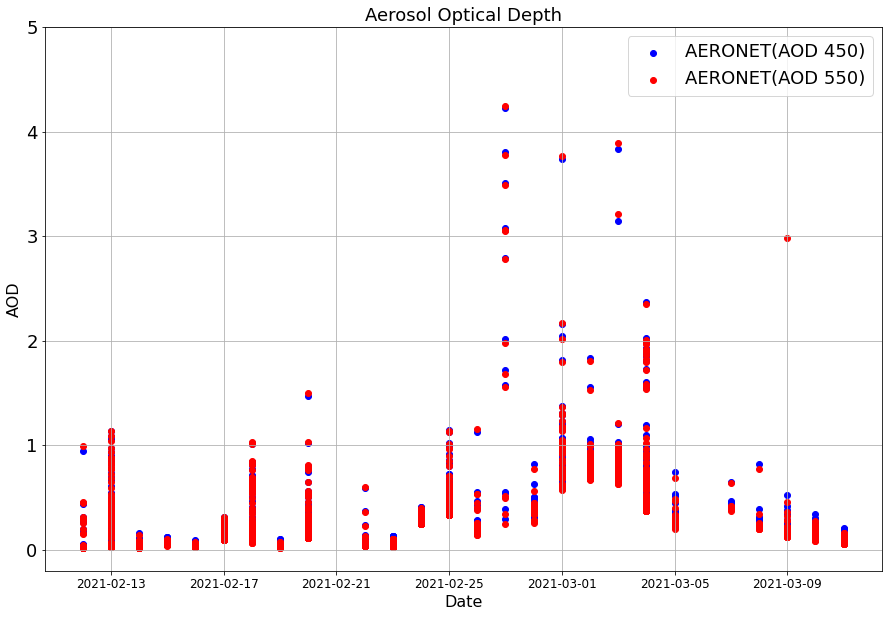

In [120]:
plt.scatter(df2['Date'],df2['AOD_450nm'], c ="blue", label='AERONET(AOD 450)')
plt.scatter(df2['Date'],df2['AOD_550nm'], c ="red",label='AERONET(AOD 550)')
#plt.scatter(df['day'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(x=df['hour'],y=df['AOD550'], c ="red",label='AOD550')
#plt.scatter(x=df['hour'],y=df['AOD700'], c ="green",label='AOD700')
plt.xlabel('Date',fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.ylabel('AOD',fontsize=16)
plt.tick_params(axis='y', labelsize=18)
#plt.xlim(35, 65)
plt.legend()
plt.rcParams["figure.figsize"] = (15,10)
#plt.xlabel('Relative Humidity',fontsize=16)
#plt.ylabel('Growth Factor',fontsize=16)
plt.ylim(-0.2, 5)
plt.grid()
plt.title("Aerosol Optical Depth",fontsize=18)
plt.legend(loc='upper right',prop={'size': 18})
#plt.legend()
plt.show()

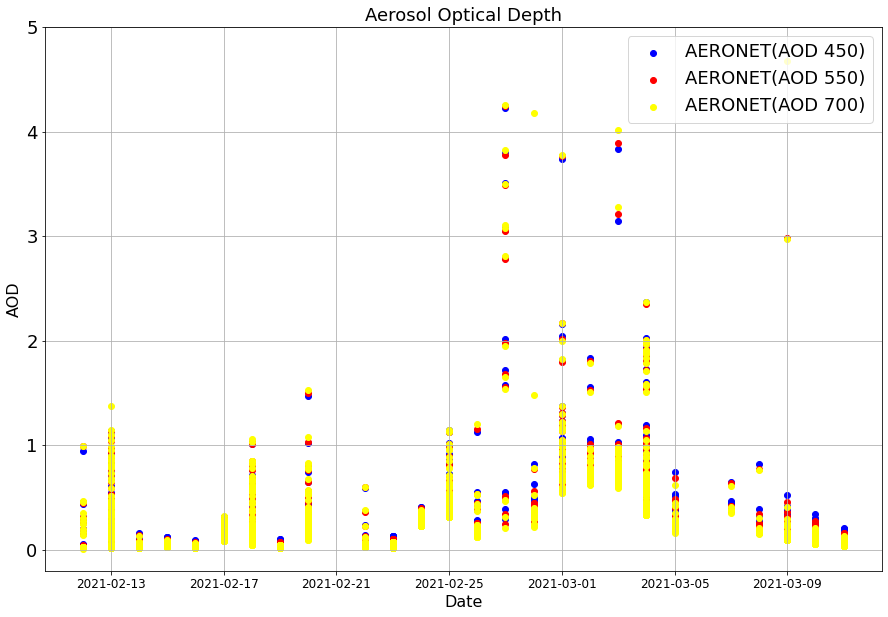

In [121]:
plt.scatter(df2['Date'],df2['AOD_450nm'], c ="blue", label='AERONET(AOD 450)')
plt.scatter(df2['Date'],df2['AOD_550nm'], c ="red",label='AERONET(AOD 550)')
plt.scatter(df2['Date'],df2['AOD_700nm'], c ="yellow",label='AERONET(AOD 700)')
#plt.scatter(df['day'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(x=df['hour'],y=df['AOD550'], c ="red",label='AOD550')
#plt.scatter(x=df['hour'],y=df['AOD700'], c ="green",label='AOD700')
plt.xlabel('Date',fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.ylabel('AOD',fontsize=16)
plt.tick_params(axis='y', labelsize=18)
#plt.xlim(35, 65)
plt.legend()
plt.rcParams["figure.figsize"] = (15,10)
#plt.xlabel('Relative Humidity',fontsize=16)
#plt.ylabel('Growth Factor',fontsize=16)
plt.ylim(-0.2, 5)
plt.grid()
plt.title("Aerosol Optical Depth",fontsize=18)
plt.legend(loc='upper right',prop={'size': 18})
#plt.legend()
plt.show()

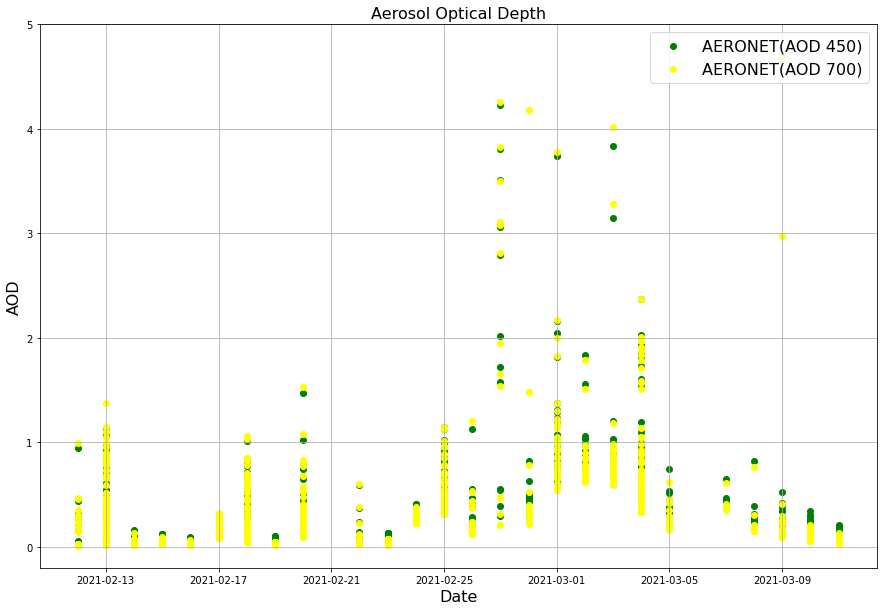

In [52]:
plt.scatter(df2['Date'],df2['AOD_450nm'], c ="green", label='AERONET(AOD 450)')
plt.scatter(df2['Date'],df2['AOD_700nm'], c ="yellow",label='AERONET(AOD 700)')
#plt.scatter(df['day'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(x=df['hour'],y=df['AOD550'], c ="red",label='AOD550')
#plt.scatter(x=df['hour'],y=df['AOD700'], c ="green",label='AOD700')
plt.xlabel('Date',fontsize=16)
plt.ylabel('AOD',fontsize=16)
#plt.xlim(35, 65)
plt.legend()
plt.rcParams["figure.figsize"] = (15,10)
#plt.xlabel('Relative Humidity',fontsize=16)
#plt.ylabel('Growth Factor',fontsize=16)
plt.ylim(-0.2, 5)
plt.grid()
plt.title("Aerosol Optical Depth",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})
#plt.legend()
plt.show()

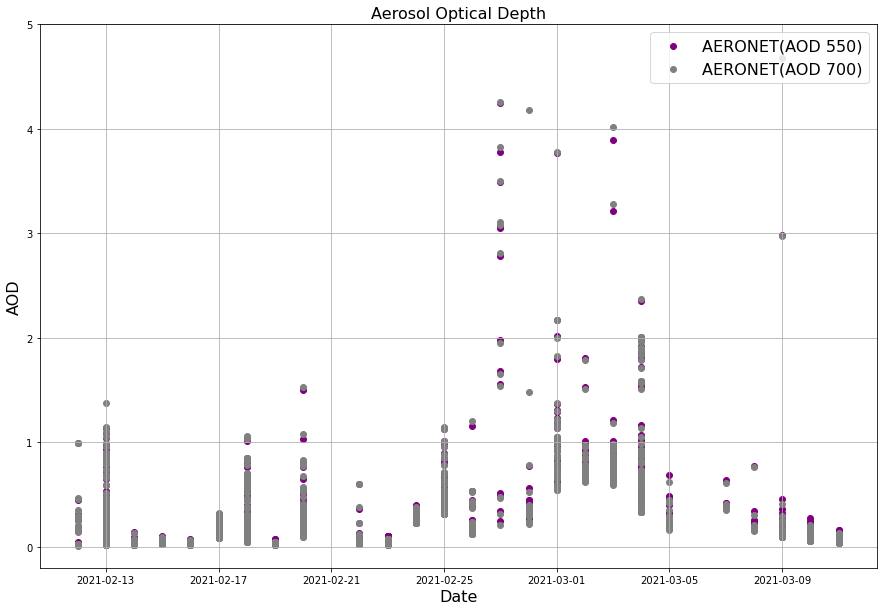

In [113]:
plt.scatter(df2['Date'],df2['AOD_550nm'], c ="purple", label='AERONET(AOD 550)')
plt.scatter(df2['Date'],df2['AOD_700nm'], c ="grey",label='AERONET(AOD 700)')
#plt.scatter(df['day'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(x=df['hour'],y=df['AOD550'], c ="red",label='AOD550')
#plt.scatter(x=df['hour'],y=df['AOD700'], c ="green",label='AOD700')
plt.xlabel('Date',fontsize=16)
plt.ylabel('AOD',fontsize=16)
#plt.xlim(35, 65)
plt.legend()
plt.rcParams["figure.figsize"] = (15,10)
#plt.xlabel('Relative Humidity',fontsize=16)
#plt.ylabel('Growth Factor',fontsize=16)
plt.ylim(-0.2, 5)
plt.grid()
plt.title("Aerosol Optical Depth",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})
#plt.legend()
plt.show()

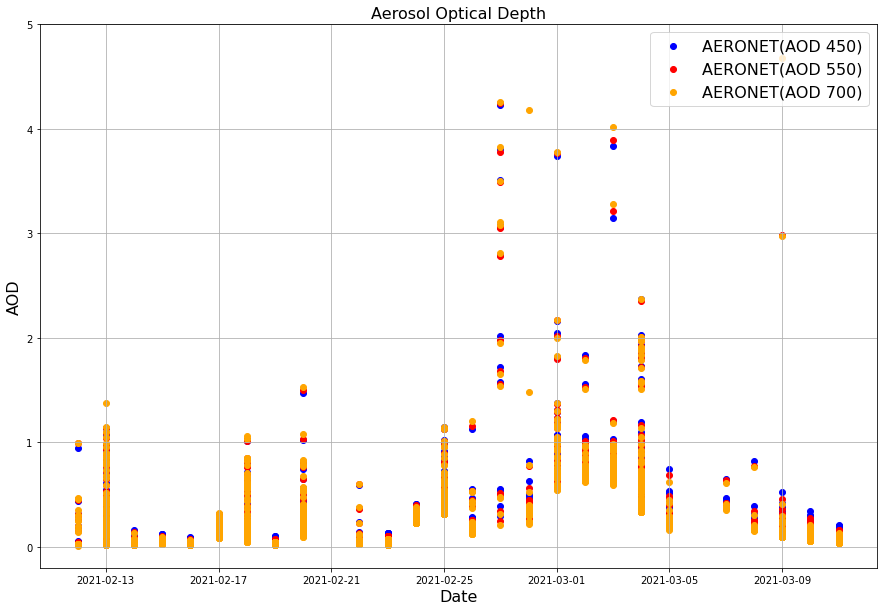

In [74]:
plt.scatter(df2['Date'],df2['AOD_450nm'], c ="blue", label='AERONET(AOD 450)')
plt.scatter(df2['Date'],df2['AOD_550nm'], c ="red",label='AERONET(AOD 550)')
plt.scatter(df2['Date'],df2['AOD_700nm'], c ="orange",label='AERONET(AOD 700)')
#plt.scatter(df['day'],df['AE_550-700'], c ="yellow",marker = '+',s = 60,label='AE - 550_700')
#plt.scatter(x=df['hour'],y=df['AOD550'], c ="red",label='AOD550')
#plt.scatter(x=df['hour'],y=df['AOD700'], c ="green",label='AOD700')
plt.xlabel('Date',fontsize=16)
plt.ylabel('AOD',fontsize=16)
#plt.xlim(35, 65)
plt.legend()
plt.rcParams["figure.figsize"] = (15,10)
#plt.xlabel('Relative Humidity',fontsize=16)
#plt.ylabel('Growth Factor',fontsize=16)
plt.ylim(-0.2, 5)
plt.grid()
plt.title("Aerosol Optical Depth",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})
#plt.legend()
plt.show()

In [69]:
date1 = df["Dates"]
date2 = df2["Date"]
AOD = df2["AOD_450nm"]
SCA = df["Sca450"]

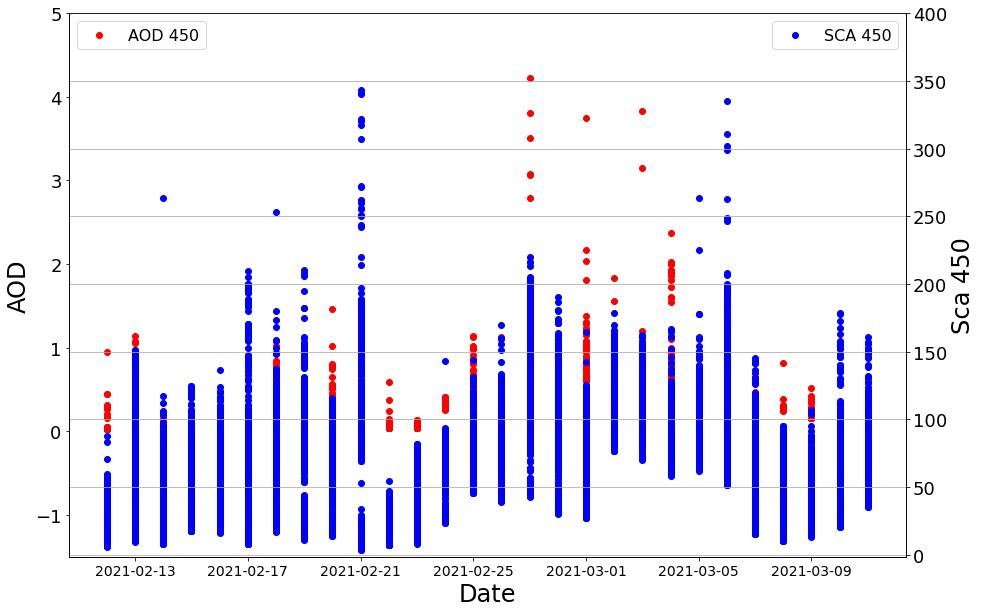

In [70]:
# Create Plot

fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Date',fontsize=24) 
ax1.set_ylabel('AOD',fontsize=24) 
ax1.scatter(date2, AOD, color = 'red',label='AOD 450') 
#ax1.scatter.plot(date2, AOD, color = 'red') 
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=18)
plt.legend(loc='upper left',prop={'size': 16})

ax1.set_ylim(-1.5,5)
  
# Adding Twin Axes

ax2 = ax1.twinx() 
ax2.scatter(date1, SCA, color = 'blue',label='SCA 450')  
#ax2.scatter.plot(date1, SCA, color = 'blue')  
ax2.set_ylim(-1.5, 400)
#fig.autofmt_xdate()
# Add label

plt.ylabel('Sca 450',fontsize='24') 
plt.tick_params(axis='y', labelsize=18)

# Show plot
#plt.title("Angstrom Exponent",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})

plt.grid()
plt.show()


In [71]:
AOD2 = df2["AOD_550nm"]
SCA2 = df["Sca550"]
AOD3 = df2["AOD_700nm"]
SCA3 = df["Sca700"]

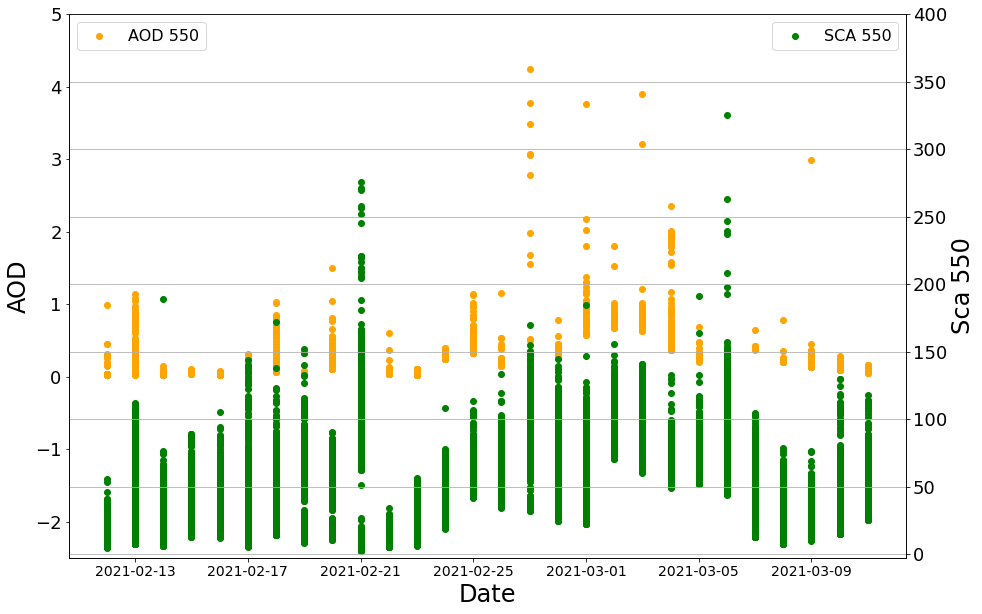

In [72]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Date',fontsize=24) 
ax1.set_ylabel('AOD',fontsize=24) 
ax1.scatter(date2, AOD2, color = 'orange',label='AOD 550') 
#ax1.scatter.plot(date2, AOD, color = 'red') 
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=18)
plt.legend(loc='upper left',prop={'size': 16})

ax1.set_ylim(-2.5,5)
  
# Adding Twin Axes

ax2 = ax1.twinx() 
ax2.scatter(date1, SCA2, color = 'green',label='SCA 550')  
#ax2.scatter.plot(date1, SCA, color = 'blue')  
ax2.set_ylim(-2.5, 400)
# Add label

plt.ylabel('Sca 550',fontsize='24') 
plt.tick_params(axis='y', labelsize=18)

# Show plot
#plt.title("Angstrom Exponent",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})

plt.grid()
plt.show()

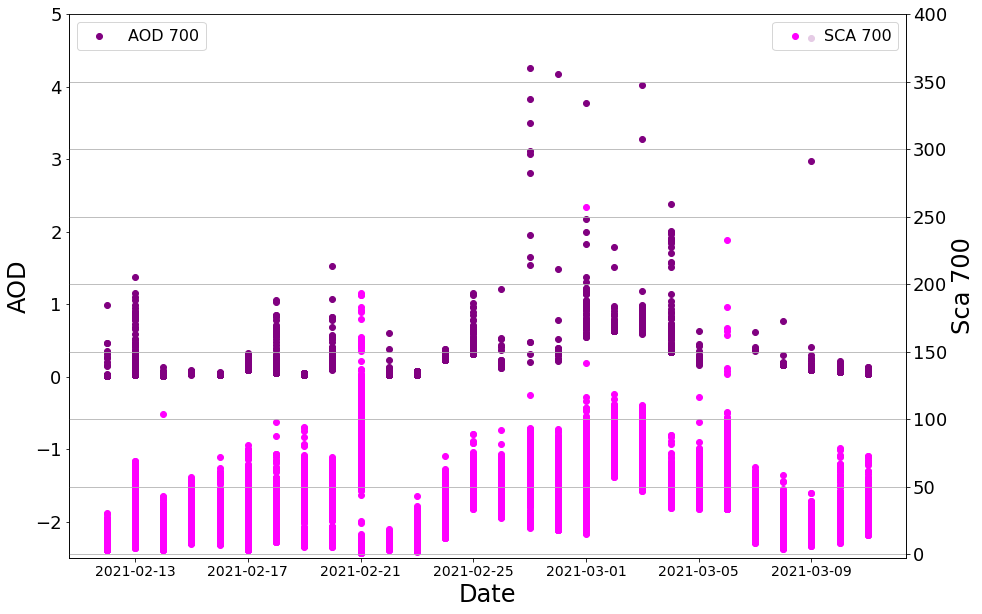

In [73]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Date',fontsize=24) 
ax1.set_ylabel('AOD',fontsize=24) 
ax1.scatter(date2, AOD3, color = 'purple',label='AOD 700') 
#ax1.scatter.plot(date2, AOD, color = 'red') 
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=18)
plt.legend(loc='upper left',prop={'size': 16})

ax1.set_ylim(-2.5,5)
  
# Adding Twin Axes

ax2 = ax1.twinx() 
ax2.scatter(date1, SCA3, color = 'magenta',label='SCA 700')  
#ax2.scatter.plot(date1, SCA, color = 'blue')  
ax2.set_ylim(-2.5, 400)
# Add label

plt.ylabel('Sca 700',fontsize='24') 
plt.tick_params(axis='y', labelsize=18)

# Show plot
#plt.title("Angstrom Exponent",fontsize=16)
plt.legend(loc='upper right',prop={'size': 16})

plt.grid()
plt.show()